In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#models
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
#metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Reading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hello/dataset.csv')
print(df.head())

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/hello/Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


Cleaning the data

In [ ]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten() #1-dimension

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0) #missing values are replaced with 0
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Encoding the symptoms based on their severity weight

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Storing the diseases and encodded symptoms in seperate dataframes

In [ ]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

Splitting the data:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3690, 17) (1230, 17) (3690,) (1230,)


Support Vector Classifier

F1-score% = 93.88667198794519 | Accuracy% = 93.98373983739837


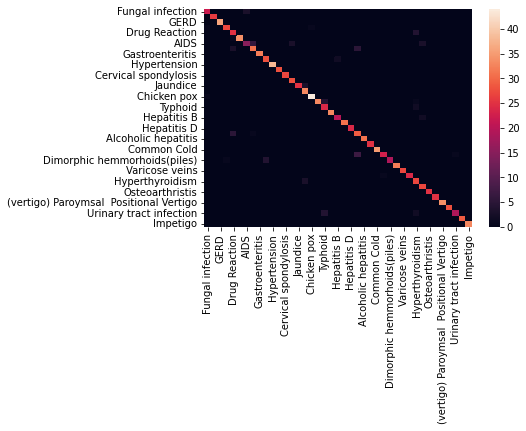

In [ ]:
model = SVC()
model_prob = SVC(probability=True)
model.fit(x_train, y_train)
#model_prob.fit(x_train, y_train)

preds_svc = model.predict(x_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, preds_svc)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

#accuracy
#y_score_svc = model_prob.predict_proba(x_test)[:,1]
print('F1-score% =', f1_score(y_test, preds_svc, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_svc)*100)

Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


F1-score% = 92.11348533798417 | Accuracy% = 92.19512195121952


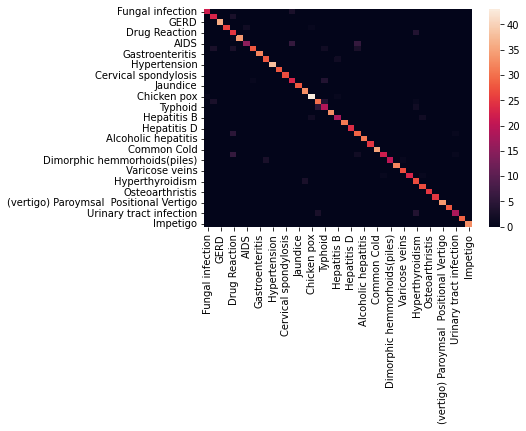

In [ ]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

preds_lr = model.predict(x_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, preds_lr)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

#accuracy
print('F1-score% =', f1_score(y_test, preds_lr, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_lr)*100)

Naive Bayes (Gaussian NB)

F1-score% = 86.04157791946521 | Accuracy% = 86.42276422764228


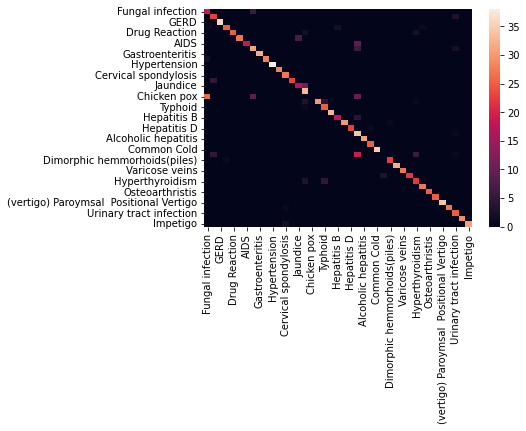

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

preds_gnb = model.predict(x_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, preds_gnb)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

#accuracy
print('F1-score% =', f1_score(y_test, preds_gnb, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_gnb)*100)

Decision Tree

F1-score% = 99.57776433082434 | Accuracy% = 99.51219512195122


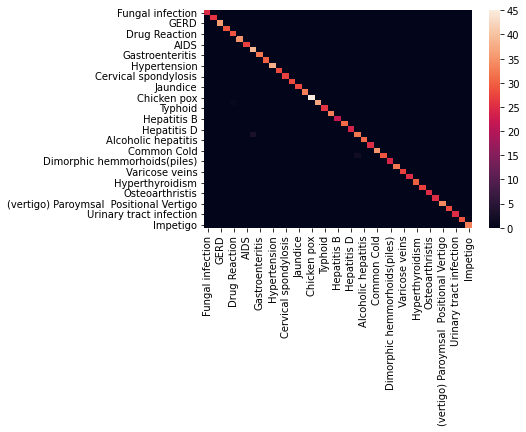

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

preds_dt = model.predict(x_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, preds_dt)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

#accuracy
print('F1-score% =', f1_score(y_test, preds_dt, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_dt)*100)

Gradient Boosting - Ensemble Technique

F1-score% = 99.32810074467744 | Accuracy% = 99.26829268292683


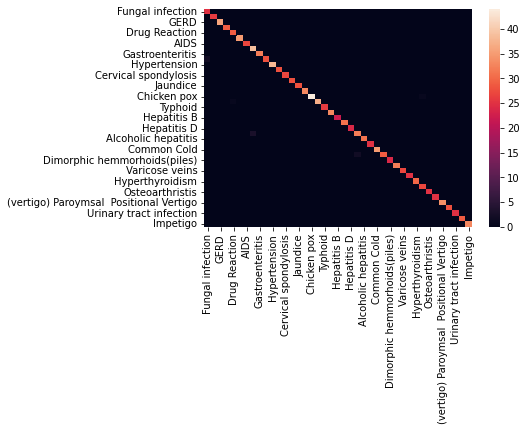

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=10,random_state=0,max_depth=4)

model.fit(x_train, y_train)

preds_gbc = model.predict(x_test)

#confusion matrix
conf_mat = confusion_matrix(y_test, preds_gbc)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
sns.heatmap(df_cm)

#accuracy
print('F1-score% =', f1_score(y_test, preds_gbc, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds_gbc)*100)

# ***Approch to compute AUC score of multi class classification problem***

**One vs All :** It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident

In [ ]:
import statistics
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [ ]:
roc_auc_dict = roc_auc_score_multiclass(y_test, preds_svc)
res=statistics.mean(list(roc_auc_dict.values()))
print("The computed auc score is : " + str(res))

The computed auc score is : 0.9685364025332158


In [ ]:
roc_auc_dict = roc_auc_score_multiclass(y_test, preds_lr)
res=statistics.mean(list(roc_auc_dict.values()))
print("The computed auc score is : " + str(res))

The computed auc score is : 0.959127731190456


In [ ]:
roc_auc_dict = roc_auc_score_multiclass(y_test, preds_gnb)
res=statistics.mean(list(roc_auc_dict.values()))
print("The computed auc score is : " + str(res))

The computed auc score is : 0.9361757563552539


In [ ]:
roc_auc_dict = roc_auc_score_multiclass(y_test, preds_dt)
res=statistics.mean(list(roc_auc_dict.values()))
print("The computed auc score is : " + str(res))

The computed auc score is : 0.9977857149324102


In [ ]:
roc_auc_dict = roc_auc_score_multiclass(y_test, preds_gbc)
res=statistics.mean(list(roc_auc_dict.values()))
print("The computed auc score is : " + str(res))

The computed auc score is : 0.996671325967513
